# Obesity in India <br> <br>

## 1. Getting ready with the data

In [1]:
# Importing the necessary libraries and data

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("NFHS_5_Factsheets_Data.xls")

In [2]:
df.replace('*', pd.NA, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Columns: 136 entries, States/UTs to Men age 15 years and above who consume alcohol (%)
dtypes: float64(25), int64(3), object(108)
memory usage: 118.1+ KB


In [4]:
#df.columns.tolist()

In [5]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')
correlation_matrix = df_numeric.corr()
filtered_matrix = correlation_matrix[(correlation_matrix > 0.4)]
filtered_matrix = filtered_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

In [6]:
# Taking the relevent columns 

column_names = [    
    "Households using iodized salt (%)",
    "Children under 5 years who are underweight (weight-for-age)18 (%)",
    "Population living in households that use an improved sanitation facility2 (%)",
    "Women age 20-24 years married before age 18 years (%)",
    "Men age 25-29 years married before age 21 years (%)",
    "Children under 5 years who are stunted (height-for-age)18 (%)",
    "Children under 5 years who are wasted (weight-for-height)18 (%)",
    "Adolescent fertility rate for women age 15-19 years5",
    "Women (age 15-49 years) who have high risk waist-to-hip ratio (≥0.85) (%)",
    "Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Any method6 (%)",
    
    "Children under 5 years who are overweight (weight-for-height)20 (%)",
    "Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)",
    "Men (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%)",
    "Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Pill (%)",
    "Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Injectables (%)",
    "Women age 15 years and above who use any kind of tobacco (%)",
    "Women age 15 years and above who consume alcohol (%)", 
    "Men age 15-49 years who are anaemic (<13.0 g/dl)22 (%)",                                                                               
    
    "Women (age 15-49 years) who are overweight or obese (BMI ≥25.0 kg/m2)21 (%)",
    "Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)",
    "Mothers who consumed iron folic acid for 180 days or more when they were pregnant (for last birth in the 5 years before the survey} (%)",
    "Women age 15 years and above wih very high (>160 mg/dl) Blood sugar level23 (%)",
    "Women age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level or taking medicine to control blood sugar level23 (%)",
    "Women age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%)",
    "Women age 15-24 years who use hygienic methods of protection during their menstrual period26 (%)", 
    
    "Men (age 15-49 years) who are overweight or obese (BMI ≥25.0 kg/m2) (%)", 
    "Men (age 15 years and above wih  very high (>160 mg/dl) Blood sugar level23 (%)",
    "Men age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%)",     
    "Men age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%)"

]
obese_data = df[column_names]

In [7]:
# Renaming columns with short strings  

column_mapping = {
    "Households using iodized salt (%)": "Households using iodized salt (%)",
    "Children under 5 years who are underweight (weight-for-age)18 (%)": 'underweight child under 5',
    "Population living in households that use an improved sanitation facility2 (%)": 'population with improved sanitation',
    "Women age 20-24 years married before age 18 years (%)": 'women married before 18 (20-24)',
    "Men age 25-29 years married before age 21 years (%)": "Men married before 21 (25-29)",
    "Children under 5 years who are stunted (height-for-age)18 (%)": 'stunted child under 5',
    "Children under 5 years who are wasted (weight-for-height)18 (%)": 'wasted child under 5',
    "Adolescent fertility rate for women age 15-19 years5": "Adolescent fertility rate for women (15-19)",
    "Women (age 15-49 years) who have high risk waist-to-hip ratio (≥0.85) (%)": "Women with high risk waist-to-hip ratio (15-49)",
    "Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Any method6 (%)": 'family planning - any method',

    "Children under 5 years who are overweight (weight-for-height)20 (%)": 'overweight child under 5',
    "Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)": 'women with low BMI (15-49)',
    "Men (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%)": 'men with low BMI (15-49)',
    "Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Pill (%)": 'family planning - pill',
    "Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Injectables (%)": 'family planning - injectables',
    "Women age 15 years and above who use any kind of tobacco (%)": 'women using tobacco',
    "Women age 15 years and above who consume alcohol (%)": "Alcohol consuming women", 
    "Men age 15-49 years who are anaemic (<13.0 g/dl)22 (%)": "Men who are anemic (15-49)",
    
    "Women (age 15-49 years) who are overweight or obese (BMI ≥25.0 kg/m2)21 (%)": 'overweight or obese women (15-49)',
    "Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)": 'mothers with sufficient iron folic acid (100+ days)',
    "Mothers who consumed iron folic acid for 180 days or more when they were pregnant (for last birth in the 5 years before the survey} (%)": 'mothers with sufficient iron folic acid (180+ days)',
    "Women age 15 years and above wih very high (>160 mg/dl) Blood sugar level23 (%)": 'women with very high blood sugar (15+)',
    "Women age 15 years and above wih high or very high (>140 mg/dl) Blood sugar level or taking medicine to control blood sugar level23 (%)": 'women with high or very high blood sugar or on medication (15+)',
    "Women age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%)": 'women with elevated blood pressure or on medication (15+)',
    "Women age 15-24 years who use hygienic methods of protection during their menstrual period26 (%)": 'women using hygienic methods (15-24)',
    
    "Men (age 15-49 years) who are overweight or obese (BMI ≥25.0 kg/m2) (%)": 'overweight or obese men (15-49)',
    "Men (age 15 years and above wih  very high (>160 mg/dl) Blood sugar level23 (%)": "Men with very high blood sugar level (15+)",
    "Men age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%)": 'men with high or very high blood sugar or on medication (15+)',    
    "Men age 15 years and above wih Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%)":'men with elevated blood pressure or on medication (15+)',
}


obese_data.rename(columns=column_mapping, inplace=True)

C:\Users\Anany\AppData\Local\Temp\ipykernel_12980\2569854991.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obese_data.rename(columns=column_mapping, inplace=True)


In [8]:
# Handling null values with median 

obese_data = obese_data.apply(pd.to_numeric) 
obese_data = obese_data.fillna(obese_data.median(numeric_only=True))

In [9]:
obese_data = pd.concat([obese_data, df[["States/UTs", "Area"]]], axis=1)

In [10]:
# Final dataframe for the analysis 

obese_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 31 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Households using iodized salt (%)                                111 non-null    float64
 1   underweight child under 5                                        111 non-null    float64
 2   population with improved sanitation                              111 non-null    float64
 3   women married before 18 (20-24)                                  111 non-null    float64
 4   Men married before 21 (25-29)                                    111 non-null    float64
 5   stunted child under 5                                            111 non-null    float64
 6   wasted child under 5                                             111 non-null    float64
 7   Adolescent fertility rate for women (15-19) 

In [11]:
obese_data.head(3)

,Households using iodized salt (%),underweight child under 5,population with improved sanitation,women married before 18 (20-24),Men married before 21 (25-29),stunted child under 5,wasted child under 5,Adolescent fertility rate for women (15-19),Women with high risk waist-to-hip ratio (15-49),family planning - any method,...,women with very high blood sugar (15+),women with high or very high blood sugar or on medication (15+),women with elevated blood pressure or on medication (15+),women using hygienic methods (15-24),overweight or obese men (15-49),Men with very high blood sugar level (15+),men with high or very high blood sugar or on medication (15+),men with elevated blood pressure or on medication (15+),States/UTs,Area
0,96.92,27.34,81.47,14.69,11.25,30.12,18.54,27.09,59.90,69.26,...,7.97,16.27,23.62,89.37,29.79,8.54,17.14,26.61,India,Urban
1,92.97,33.78,64.90,27.02,21.14,37.34,19.51,49.27,55.15,65.55,...,5.47,12.27,20.21,72.32,19.33,6.49,15.01,22.73,India,Rural
2,94.28,32.11,70.17,23.25,17.67,35.47,19.26,42.89,56.66,66.71,...,6.25,13.51,21.28,77.33,22.88,7.15,15.69,23.98,India,Total


In [12]:
obese_data.describe()

,Households using iodized salt (%),underweight child under 5,population with improved sanitation,women married before 18 (20-24),Men married before 21 (25-29),stunted child under 5,wasted child under 5,Adolescent fertility rate for women (15-19),Women with high risk waist-to-hip ratio (15-49),family planning - any method,...,mothers with sufficient iron folic acid (100+ days),mothers with sufficient iron folic acid (180+ days),women with very high blood sugar (15+),women with high or very high blood sugar or on medication (15+),women with elevated blood pressure or on medication (15+),women using hygienic methods (15-24),overweight or obese men (15-49),Men with very high blood sugar level (15+),men with high or very high blood sugar or on medication (15+),men with elevated blood pressure or on medication (15+)
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,...,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,96.094730,25.516577,77.031622,16.432162,12.640541,30.578063,16.881261,32.773243,61.069775,64.429640,...,52.705135,32.590856,6.385946,13.805676,22.061081,85.069820,26.800946,7.277387,16.536486,25.801532
std,3.919918,8.057680,12.735908,10.747384,10.484197,6.383898,4.394124,21.518580,11.673345,10.772599,...,20.505977,18.448181,3.378088,5.324980,6.709326,11.546778,12.973936,3.134032,5.048499,8.343949
min,78.440000,9.040000,34.780000,-0.010000,-21.900000,15.050000,7.550000,0.000000,38.560000,25.860000,...,7.680000,3.100000,-13.790000,-17.240000,-30.000000,53.410000,-43.680000,-8.000000,-19.230000,-34.620000
25%,94.455000,20.065000,68.960000,8.645000,8.610000,26.210000,13.175000,18.640000,52.635000,60.750000,...,40.545000,17.350000,4.540000,10.490000,19.925000,79.555000,19.980000,5.540000,13.990000,21.260000
50%,97.435000,25.610000,78.750000,14.600000,13.070000,30.635000,17.550000,27.090000,61.685000,66.740000,...,54.220000,31.505000,6.250000,13.600000,22.450000,88.400000,28.225000,7.000000,16.760000,25.930000
75%,98.940000,31.965000,85.970000,23.180000,18.090000,34.805000,19.515000,42.950000,68.405000,71.360000,...,66.825000,42.300000,8.010000,17.430000,24.925000,93.460000,34.175000,8.850000,19.145000,30.460000
max,100.000000,43.520000,100.000000,48.130000,35.050000,48.210000,27.330000,101.910000,89.180000,77.530000,...,88.430000,73.080000,13.240000,24.830000,35.800000,100.000000,50.580000,14.050000,25.190000,43.060000


In [13]:
# Numerical columns

obese_num = obese_data.select_dtypes(include=[np.number])

## 2. Underweight children in India

In [59]:
# Underweight children by state

obese_total = obese_data[(obese_data["Area"] == "Total") & (obese_data["States/UTs"] != "India")].sort_values(by = "overweight or obese men (15-49)")

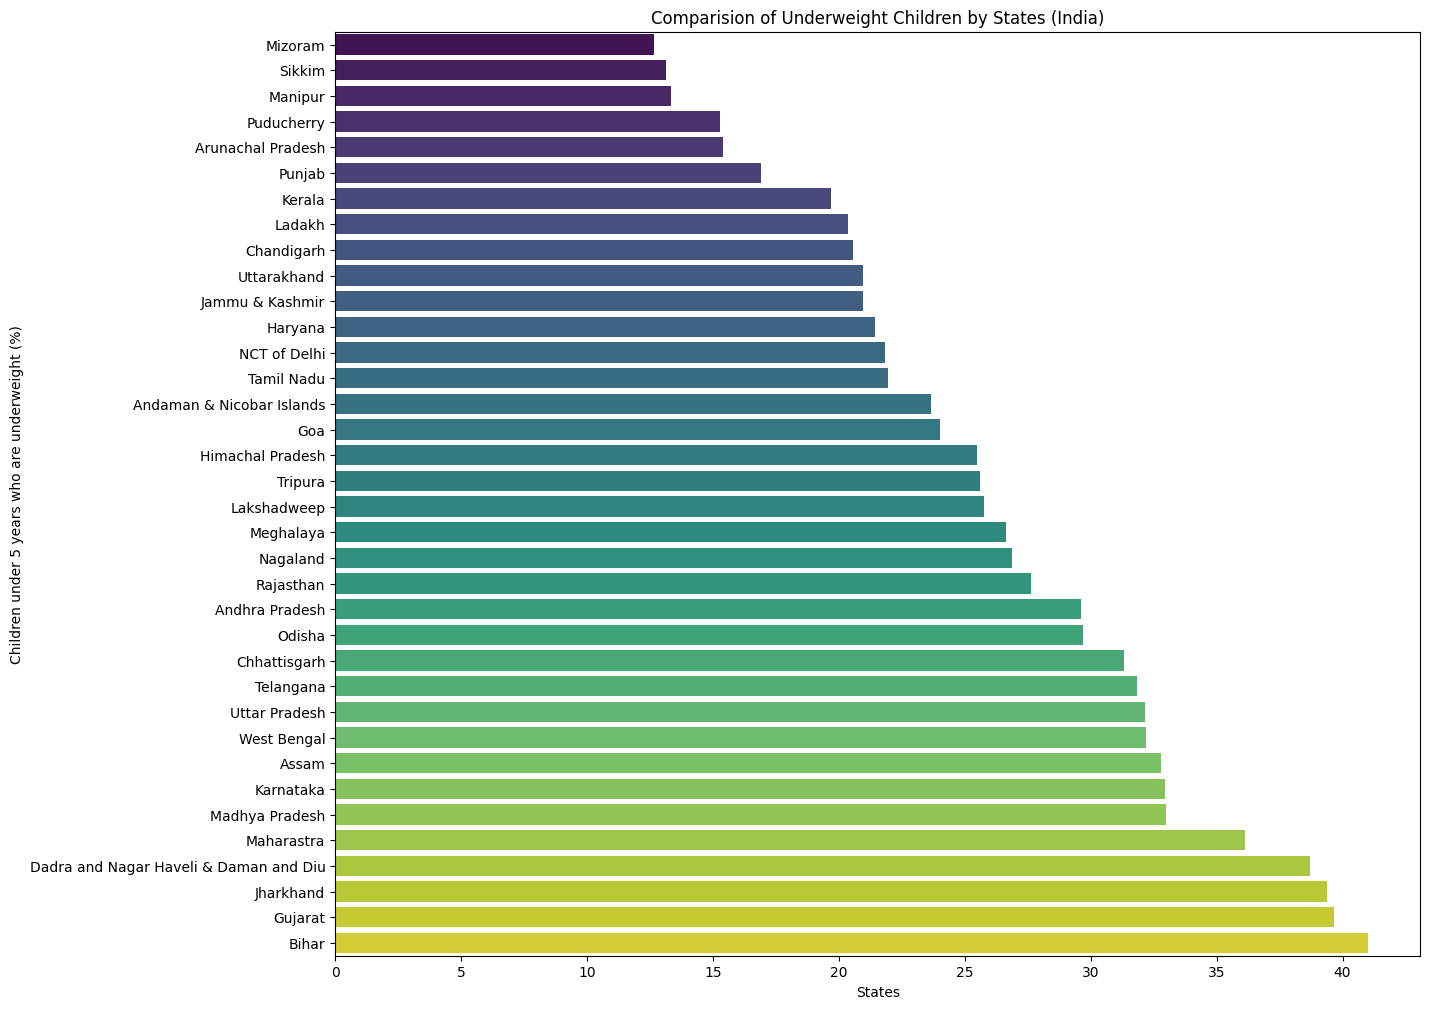

In [15]:

plt.figure(figsize = (14, 12))

categories = obese_total["States/UTs"]
values = obese_total["underweight child under 5"]

sns.barplot(x=values, y=categories, palette = "viridis")

plt.xlabel('States')
plt.ylabel('Children under 5 years who are underweight (%)')
plt.title('Comparision of Underweight Children by States (India)')

plt.show()

                            figure 2.1

In [16]:
# Comparing percentage of underweight children in rural and urban 

obese_rural_urban = obese_data[(obese_data["Area"] != "Total") & (obese_data["States/UTs"] != "India")]

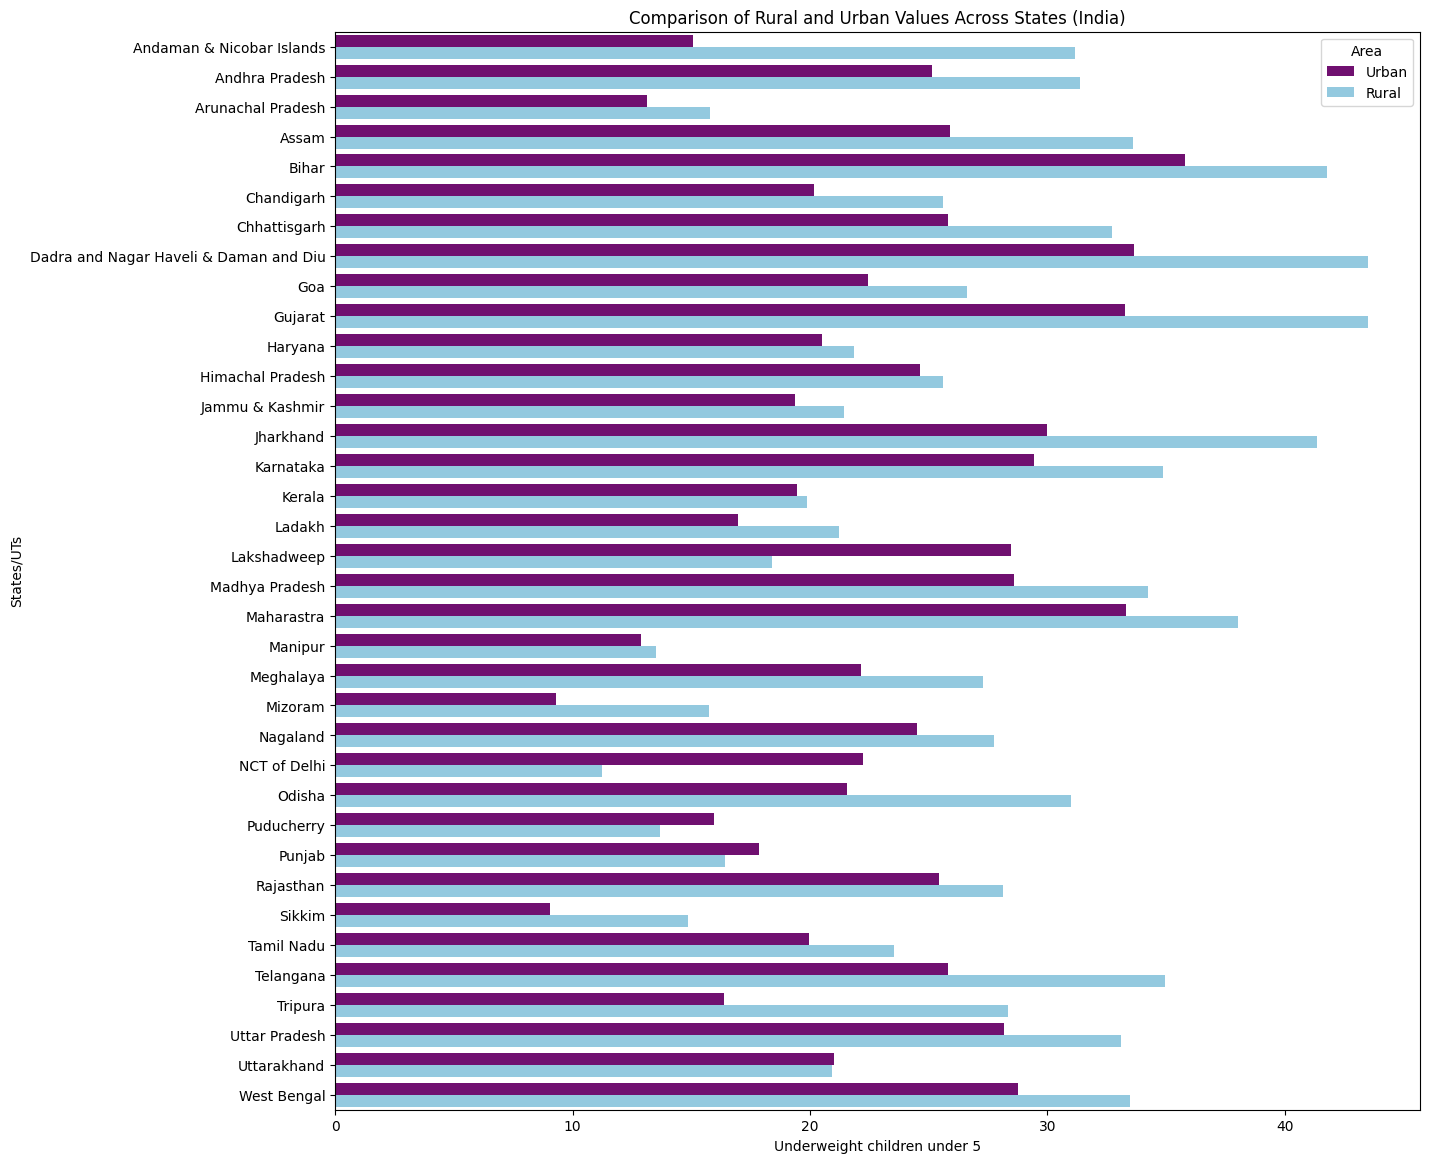

In [17]:
plt.figure(figsize = (14, 14))

sns.barplot(x='underweight child under 5', y='States/UTs', data=obese_rural_urban, hue='Area', palette={'Rural': 'skyblue', 'Urban': 'purple'}, dodge=8)

plt.xlabel('Underweight children under 5')
plt.ylabel('States/UTs')
plt.title('Comparison of Rural and Urban Values Across States (India)')

plt.show()


                            figure 2.2

In [18]:
# Total proportion of underweight children in rural and urban areas 

obese_rural_urban_total = obese_data[obese_data["Area"] != "Total"].groupby('Area')['underweight child under 5'].sum().reset_index(name='By Area')

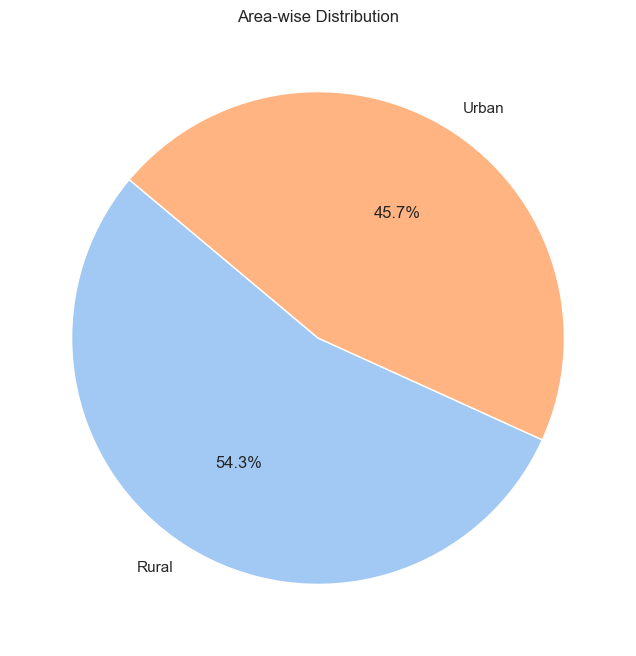

In [19]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.color_palette("pastel")
sns.set_palette("pastel")


plt.pie(obese_rural_urban_total['By Area'], labels=obese_rural_urban_total['Area'], autopct='%1.1f%%', startangle=140)
plt.title('Area-wise Distribution')
plt.show()


                            figure 2.3

In [20]:
underweight_children_cols = ['underweight child under 5', 'Households using iodized salt (%)', 
       'population with improved sanitation',
       'women married before 18 (20-24)', 'Men married before 21 (25-29)',
       'stunted child under 5', 'wasted child under 5',
       'women with low BMI (15-49)', 'men with low BMI (15-49)',
       'overweight or obese women (15-49)',
       'women using hygienic methods (15-24)',
       'Adolescent fertility rate for women (15-19)',
       'Women with high risk waist-to-hip ratio (15-49)',
       'family planning - any method']

In [21]:
# Correlation with other columns 

df = df.dropna()
correlation_matrix = obese_data[underweight_children_cols].corr()
underweight_correlation = correlation_matrix["underweight child under 5"]

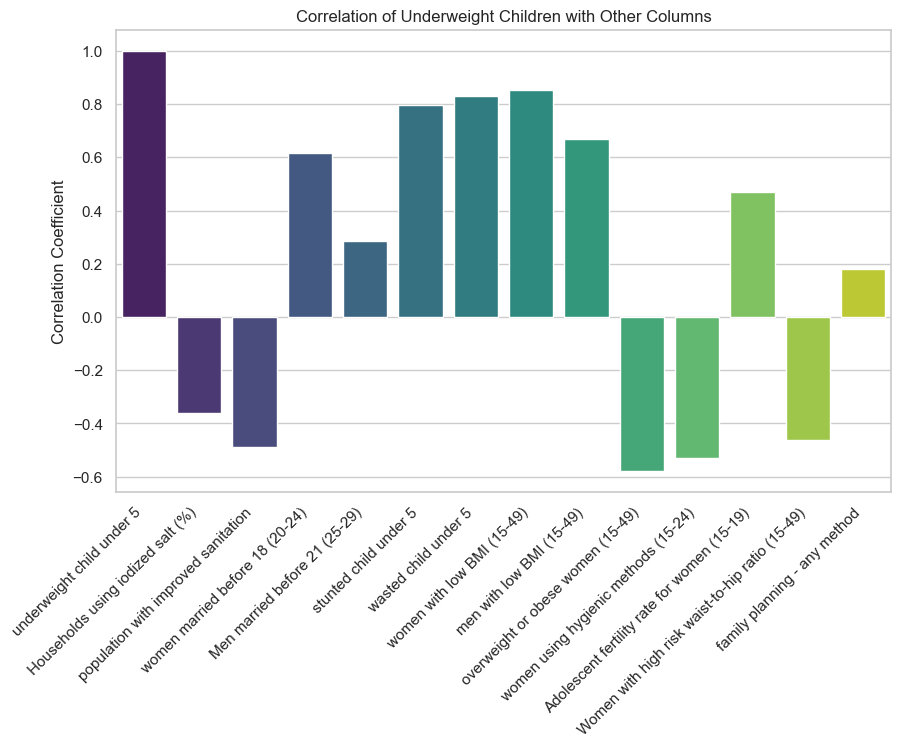

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x=underweight_correlation.index, y=underweight_correlation.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Underweight Children with Other Columns')
plt.ylabel('Correlation Coefficient')
plt.show()

                            figure 2.4

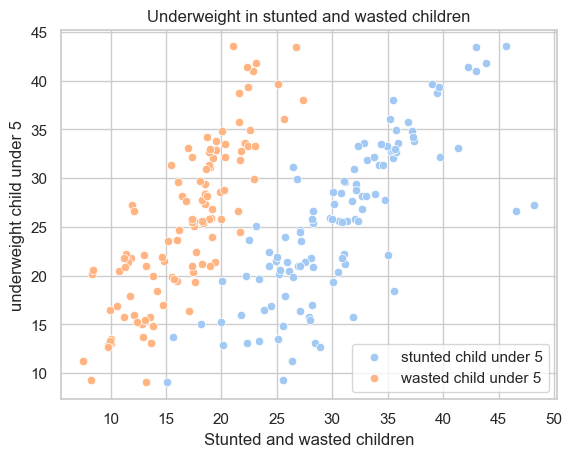

In [23]:
# relating percentage of stunted and wasted children 

sns.scatterplot( x='stunted child under 5', y='underweight child under 5', data=obese_data, label='stunted child under 5')
sns.scatterplot(x='wasted child under 5', y='underweight child under 5', data=obese_data, label='wasted child under 5')

plt.title('Underweight in stunted and wasted children')
plt.xlabel('Stunted and wasted children')
plt.ylabel('underweight child under 5')
plt.legend()
plt.show()

                            figure 2.5

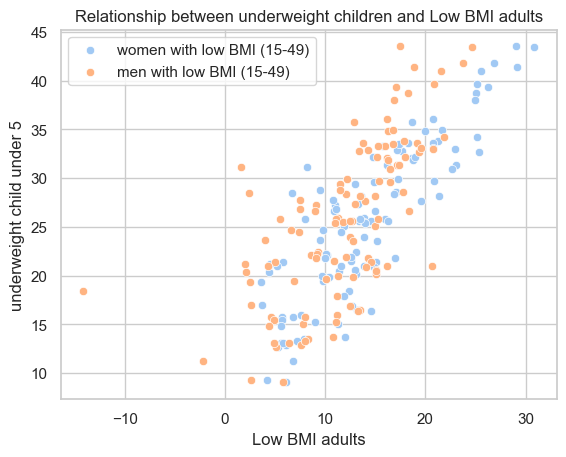

In [24]:
# Effect of women and men with low BMI

sns.scatterplot(x='women with low BMI (15-49)', y='underweight child under 5', data=obese_data, label='women with low BMI (15-49)')
sns.scatterplot(x='men with low BMI (15-49)', y='underweight child under 5', data=obese_data, label='men with low BMI (15-49)')

plt.title('Relationship between underweight children and Low BMI adults')
plt.xlabel('Low BMI adults')
plt.ylabel('underweight child under 5')
plt.legend()
plt.show()


                            figure 2.6

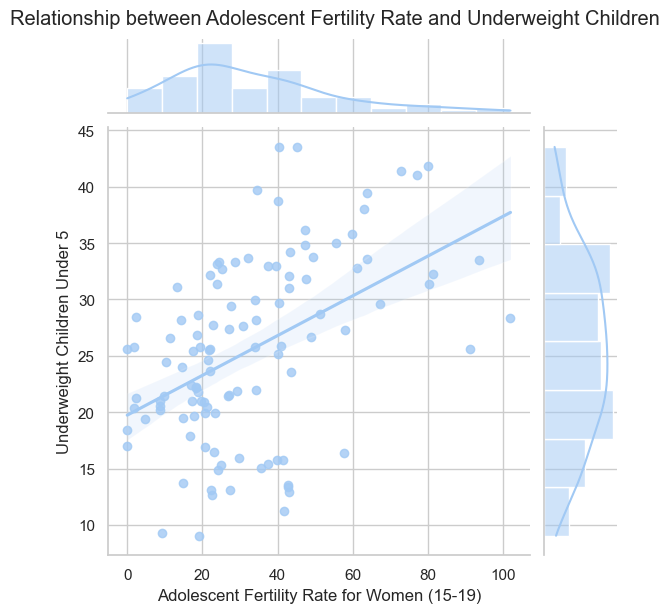

In [25]:
# Adolescent fertility rate vs Underweight Children

sns.jointplot(x='Adolescent fertility rate for women (15-19)', y='underweight child under 5', data=obese_data, kind='reg')

plt.suptitle('Relationship between Adolescent Fertility Rate and Underweight Children', y=1.02)
plt.xlabel('Adolescent Fertility Rate for Women (15-19)')
plt.ylabel('Underweight Children Under 5')
plt.show()


                            figure 2.7

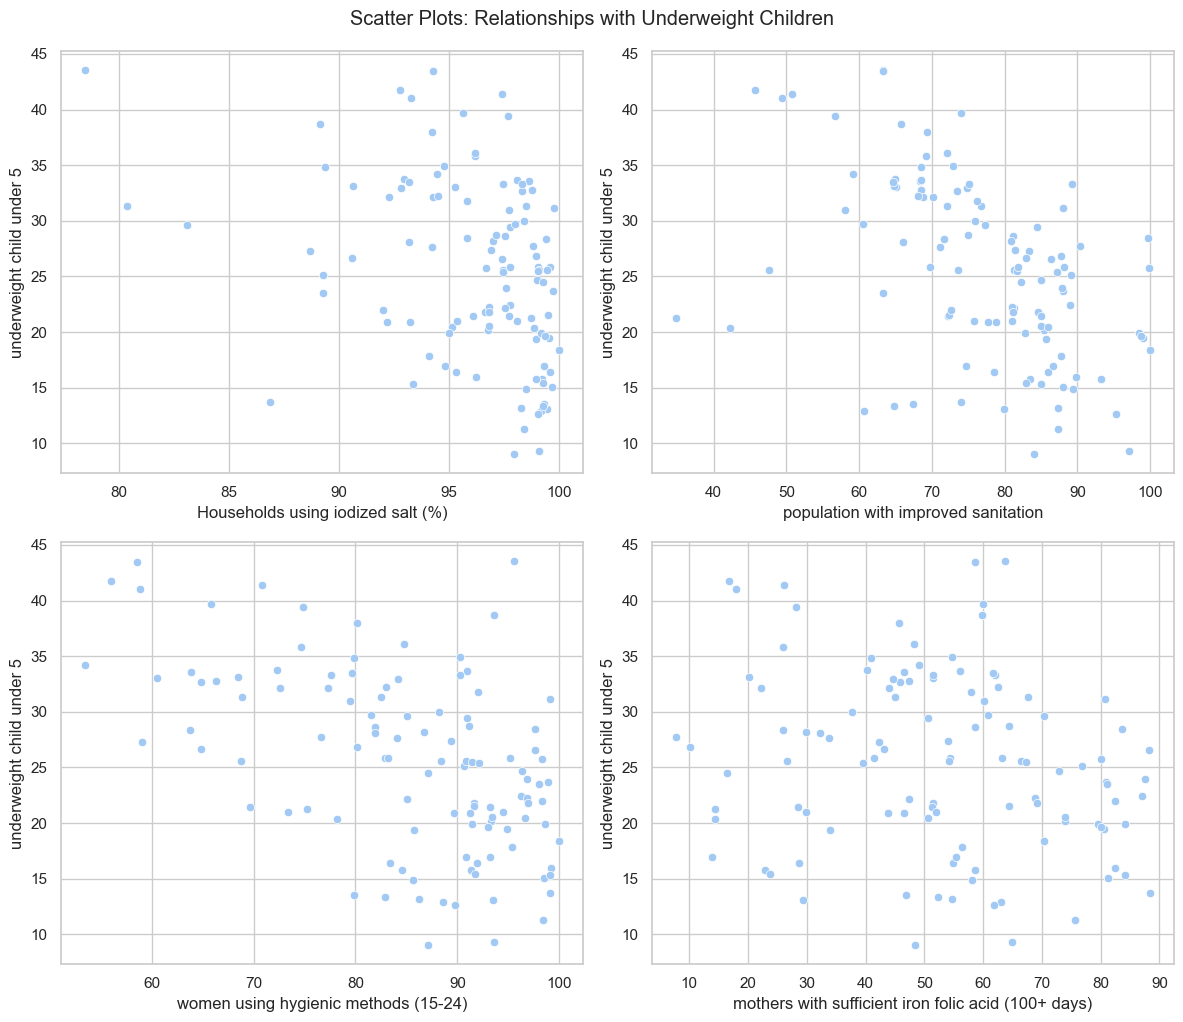

In [26]:
# Scatter plots showing relationships between Underweight Children and various columns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.scatterplot(x='Households using iodized salt (%)', y="underweight child under 5", data=obese_data, ax=axes[0, 0])
sns.scatterplot(x='population with improved sanitation', y="underweight child under 5", data=obese_data, ax=axes[0, 1])
sns.scatterplot(x='women using hygienic methods (15-24)', y="underweight child under 5", data=obese_data, ax=axes[1, 0])
sns.scatterplot(x='mothers with sufficient iron folic acid (100+ days)', y="underweight child under 5", data=obese_data, ax=axes[1, 1])

plt.tight_layout()

plt.suptitle('Scatter Plots: Relationships with Underweight Children', y=1.02)
plt.show()


                            figure 2.8

## 3. Overweight Children in India

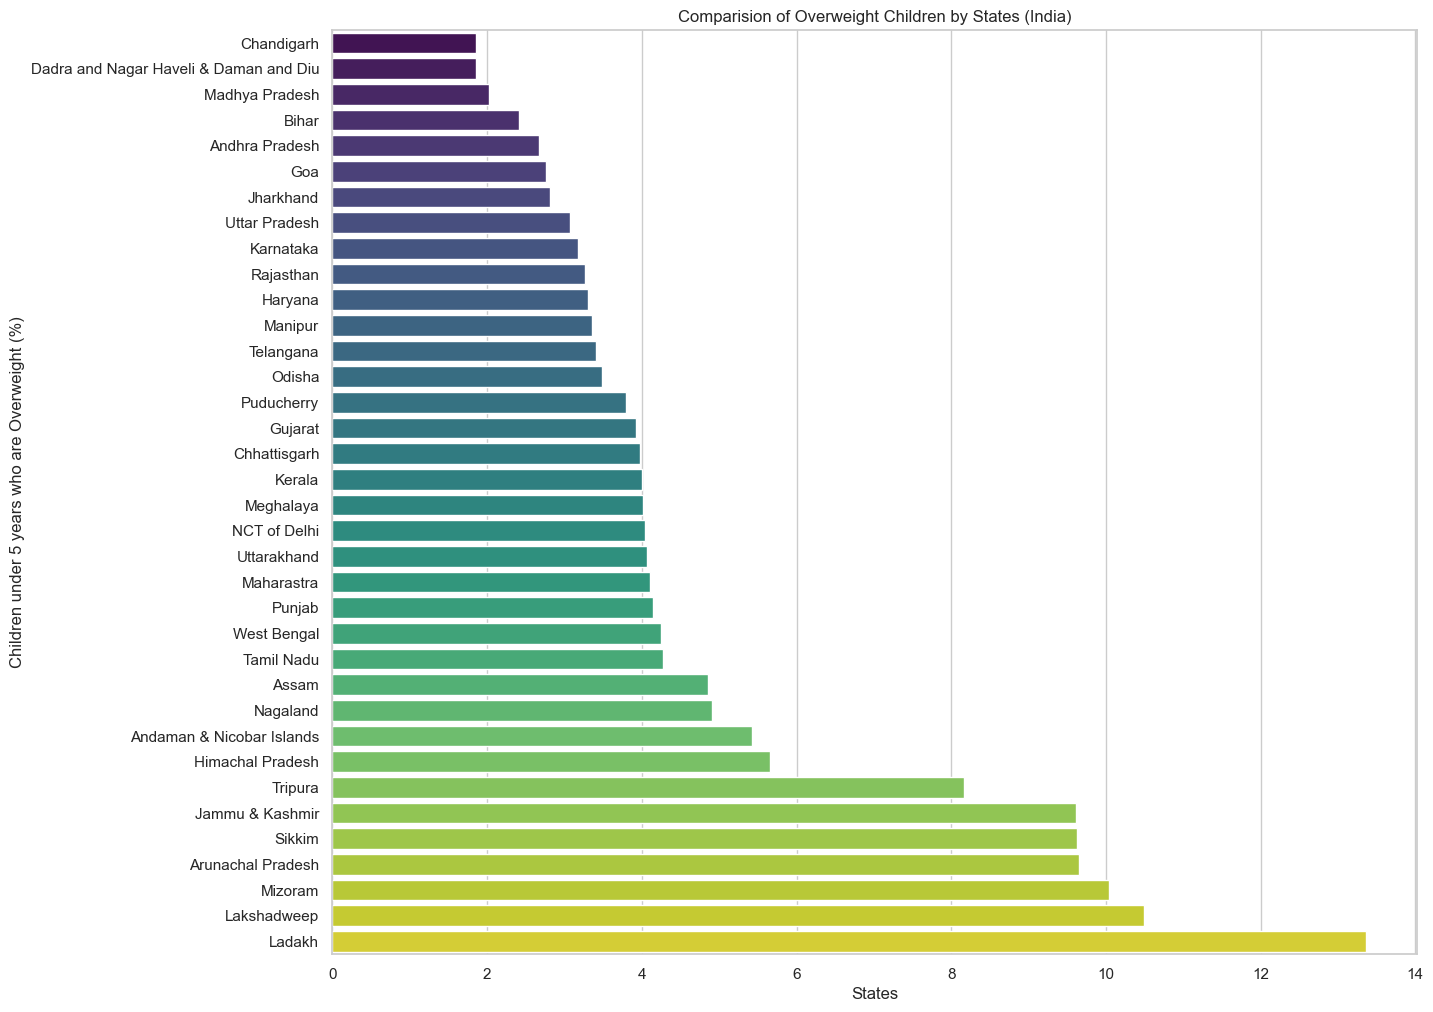

In [56]:
# Bar plot showing distribution overweight children by state 

plt.figure(figsize = (14, 12))

categories = obese_total["States/UTs"]
values = obese_total["overweight child under 5"]
sns.barplot(x=values, y=categories, palette='viridis')

plt.xlabel('States')
plt.ylabel('Children under 5 years who are Overweight (%)')
plt.title('Comparision of Overweight Children by States (India)')

plt.show()

                            figure 3.1

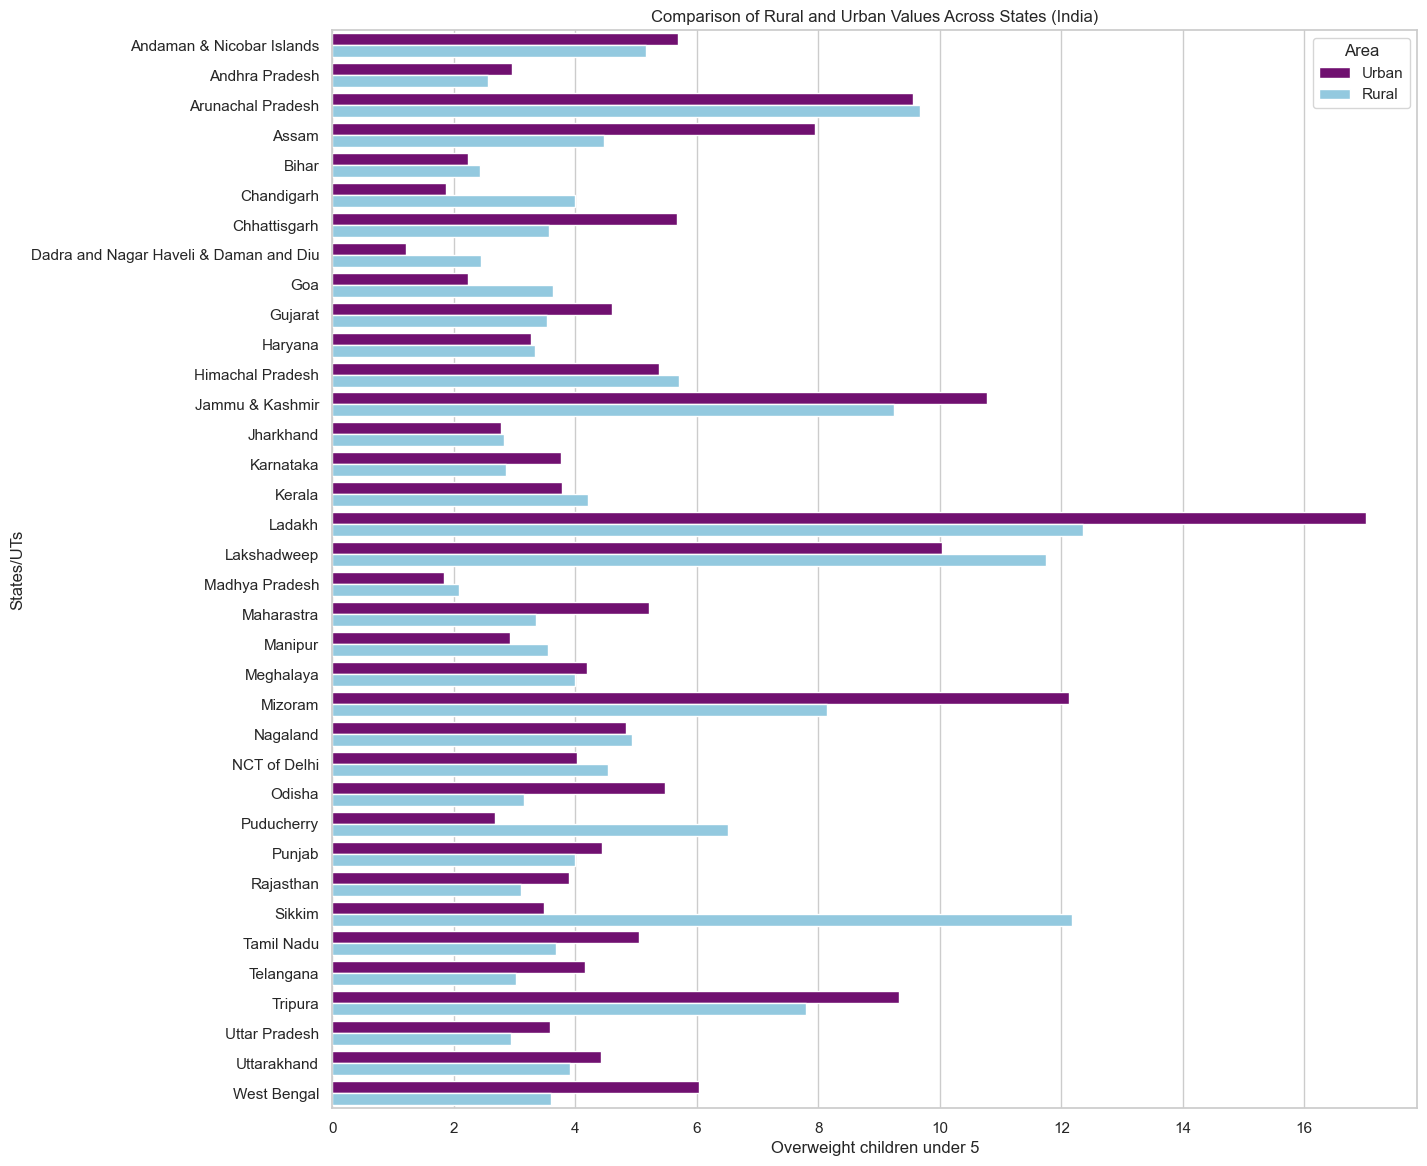

In [28]:
# Overweight children in rural and urban areas 

plt.figure(figsize = (14, 14))

sns.barplot(x='overweight child under 5', y='States/UTs', data=obese_rural_urban, hue='Area', palette={'Rural': 'skyblue', 'Urban': 'purple'}, dodge=8)

plt.xlabel('Overweight children under 5')
plt.ylabel('States/UTs')
plt.title('Comparison of Rural and Urban Values Across States (India)')

plt.show()

                            figure 3.2

In [29]:
# Area-wise Distribution of Overweight children 

obese_rural_urban_total = obese_data[obese_data["Area"] != "Total"].groupby('Area')['overweight child under 5'].sum().reset_index(name='By Area')

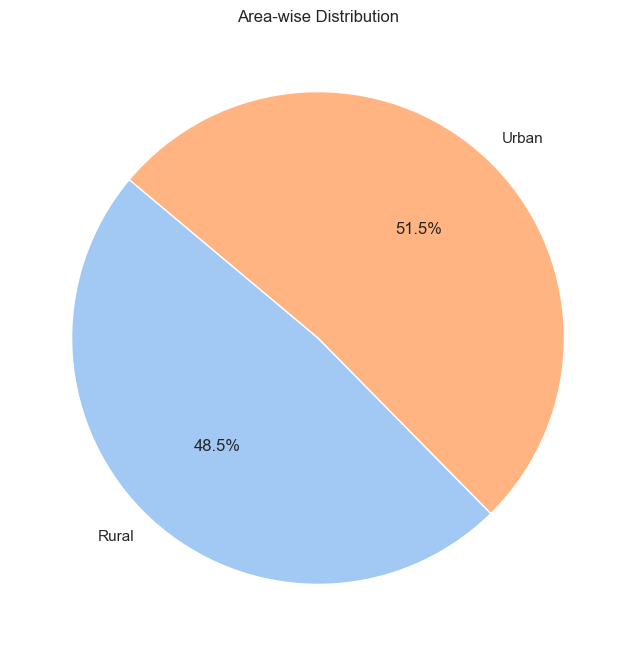

In [30]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.color_palette("pastel")
sns.set_palette("pastel")


plt.pie(obese_rural_urban_total['By Area'], labels=obese_rural_urban_total['Area'], autopct='%1.1f%%', startangle=140)
plt.title('Area-wise Distribution')
plt.show()

                            figure 3.3

In [31]:
overweight_children_cols = ['overweight child under 5',
       'family planning - pill', 'family planning - injectables',
       'women using tobacco', 'Alcohol consuming women',
       'Men who are anemic (15-49)']

In [32]:
# Correlation with other columns 

df = df.dropna()
correlation_matrix = obese_data[overweight_children_cols].corr()
overweight_correlation = correlation_matrix['overweight child under 5']

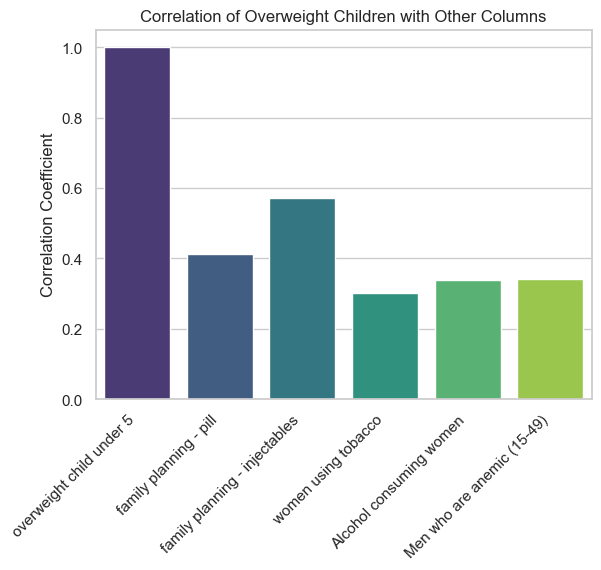

In [33]:
sns.barplot(x=overweight_correlation.index, y=overweight_correlation.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Overweight Children with Other Columns')
plt.ylabel('Correlation Coefficient')
plt.show()

                            figure 3.4    

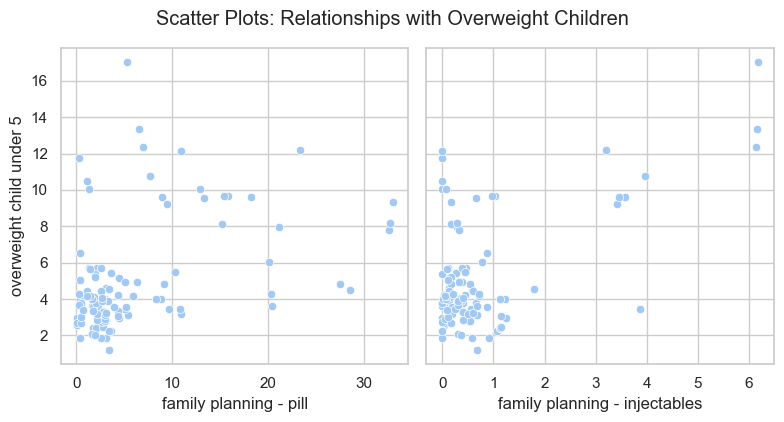

In [34]:
# Effect of family planning methods 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)

sns.scatterplot(x='family planning - pill', y='overweight child under 5', data=obese_data, ax=axes[0])
sns.scatterplot(x='family planning - injectables', y='overweight child under 5', data=obese_data, ax=axes[1])

plt.tight_layout()

plt.suptitle('Scatter Plots: Relationships with Overweight Children', y=1.05)
plt.show()

                            figure 3.5  

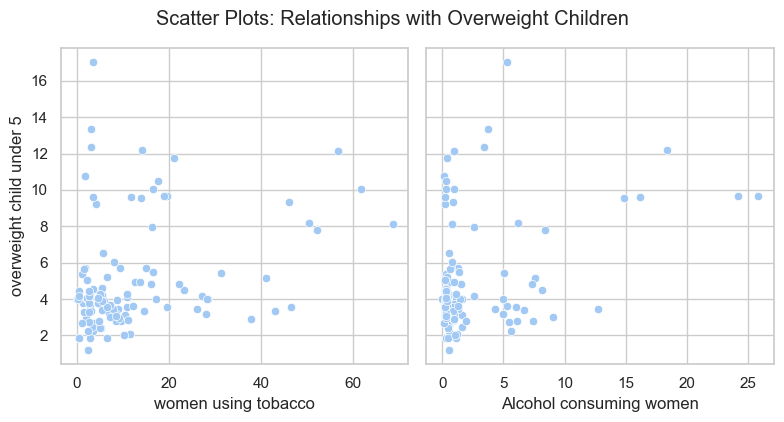

In [35]:
# Effect of tobacco and alchohol consumption in women 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)

sns.scatterplot(x='women using tobacco', y='overweight child under 5', data=obese_data, ax=axes[0])
sns.scatterplot(x='Alcohol consuming women', y='overweight child under 5', data=obese_data, ax=axes[1])

plt.tight_layout()

plt.suptitle('Scatter Plots: Relationships with Overweight Children', y=1.05)
plt.show()

                            figure 3.6  

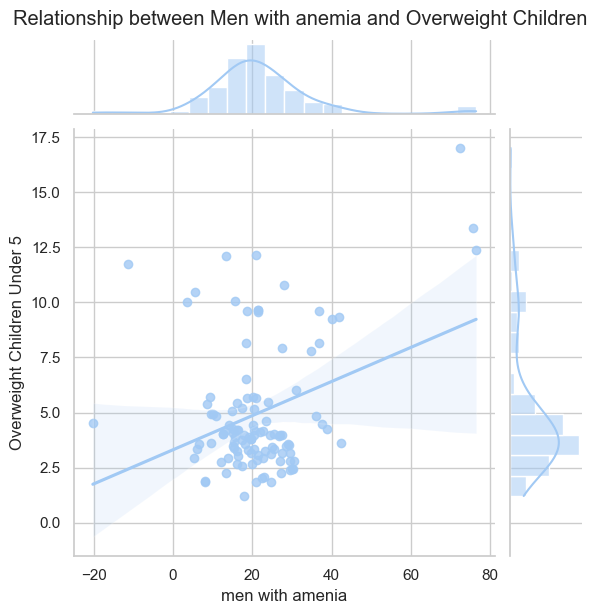

In [36]:
# Relationship between overweight children and men with amenia 

sns.jointplot(x='Men who are anemic (15-49)', y='overweight child under 5', data=obese_data, kind='reg')

plt.suptitle('Relationship between Men with anemia and Overweight Children', y=1.02)
plt.xlabel('men with amenia')
plt.ylabel('Overweight Children Under 5')
plt.show()

                            figure 3.7

## 4. Obesity in women (India) 

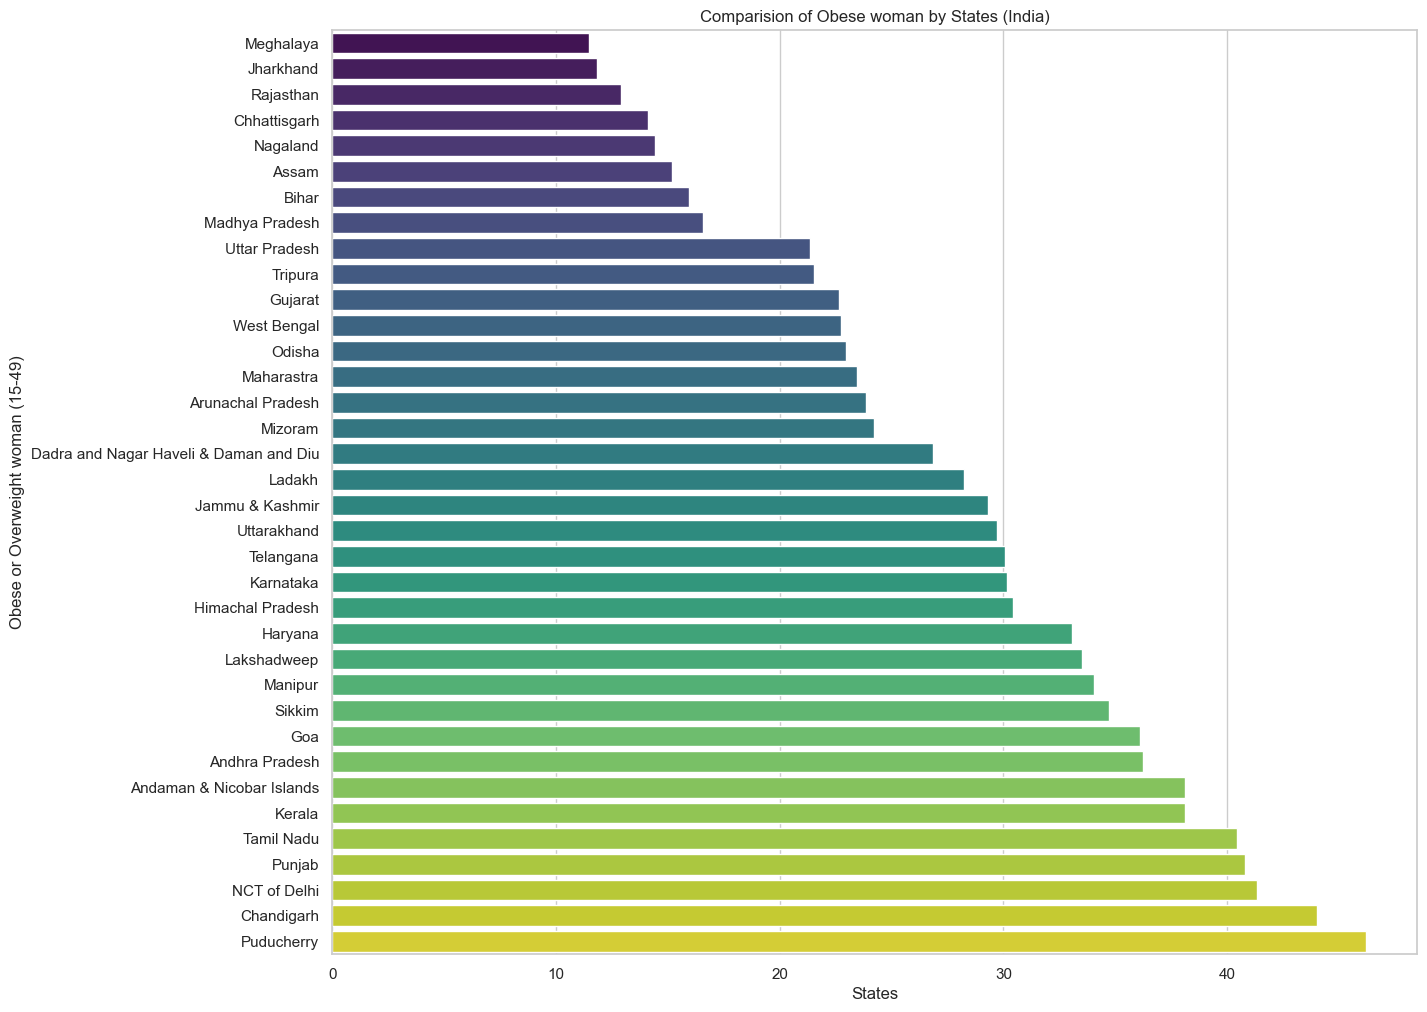

In [58]:
# Obesity in women across states

plt.figure(figsize = (14, 12))

categories = obese_total["States/UTs"]
values = obese_total["overweight or obese women (15-49)"]

sns.barplot(x=values, y=categories, palette='viridis')

plt.xlabel('States')
plt.ylabel('Obese or Overweight woman (15-49)')
plt.title('Comparision of Obese woman by States (India)')

plt.show()

                            figure 4.1

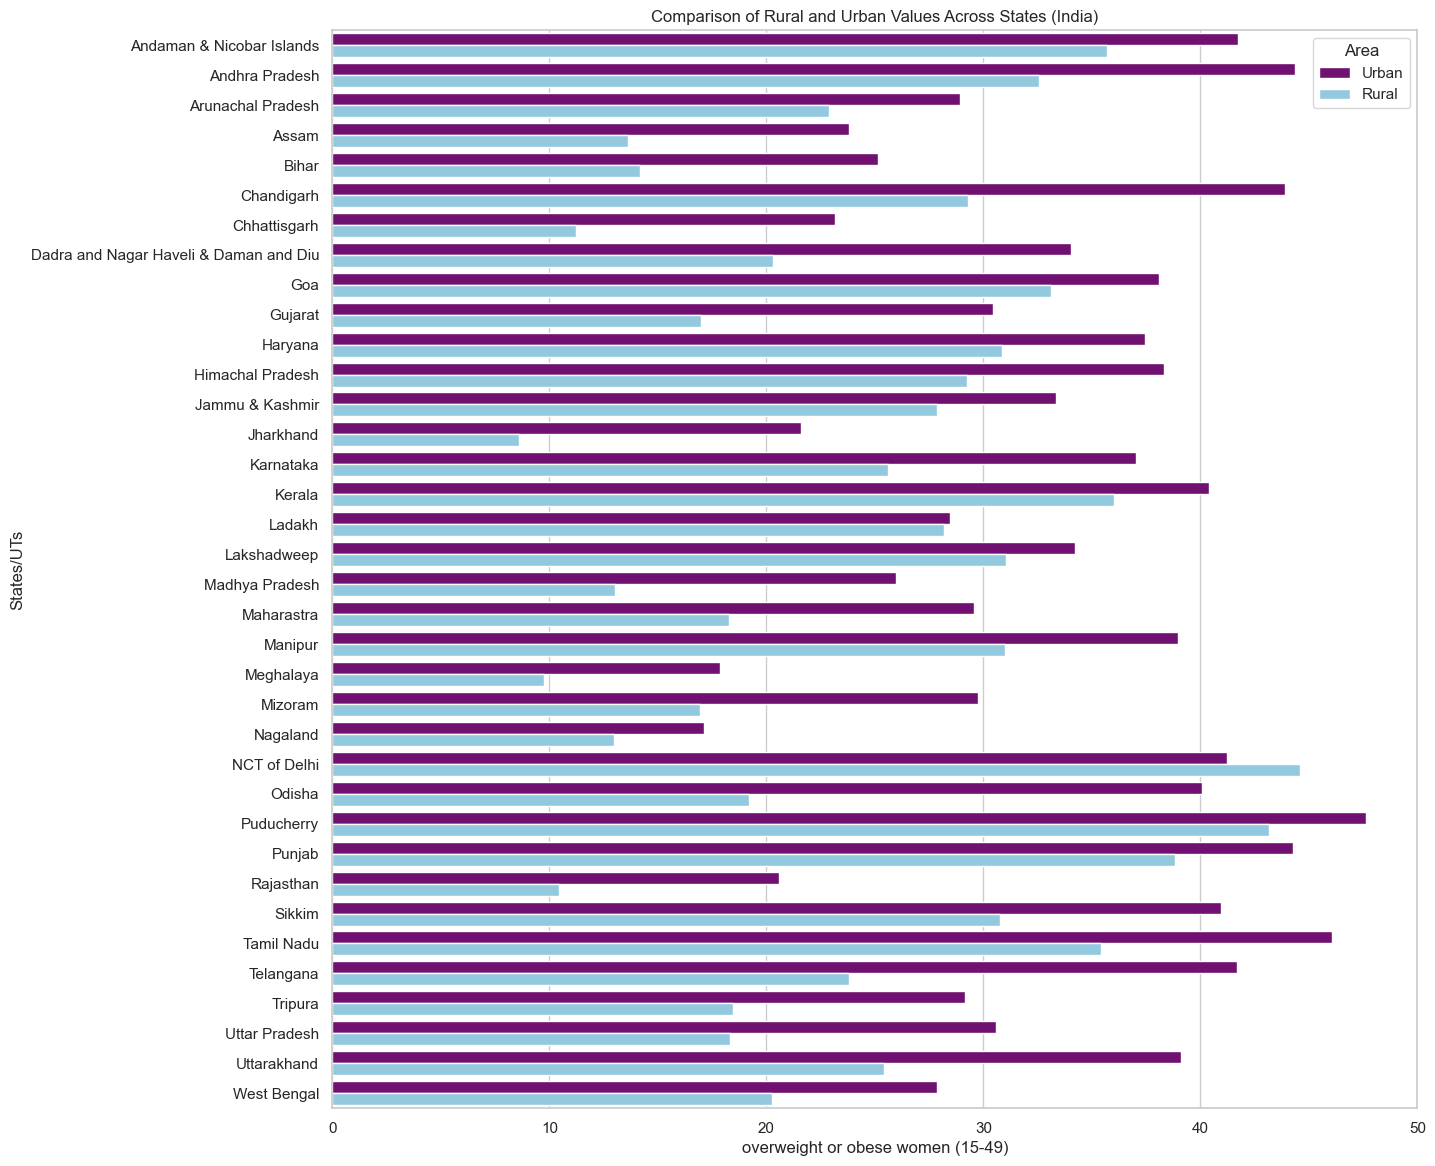

In [38]:
# Distribution of obese women by urban and rural areas 

plt.figure(figsize = (14, 14))

sns.barplot(x='overweight or obese women (15-49)', y='States/UTs', data=obese_rural_urban, hue='Area', palette={'Rural': 'skyblue', 'Urban': 'purple'}, dodge=8)

plt.xlabel('overweight or obese women (15-49)')
plt.ylabel('States/UTs')
plt.title('Comparison of Rural and Urban Values Across States (India)')

plt.show()

                            figure 4.2

In [39]:
# Area wise distribution 

obese_rural_urban_total = obese_data[obese_data["Area"] != "Total"].groupby('Area')['overweight or obese women (15-49)'].sum().reset_index(name='By Area')

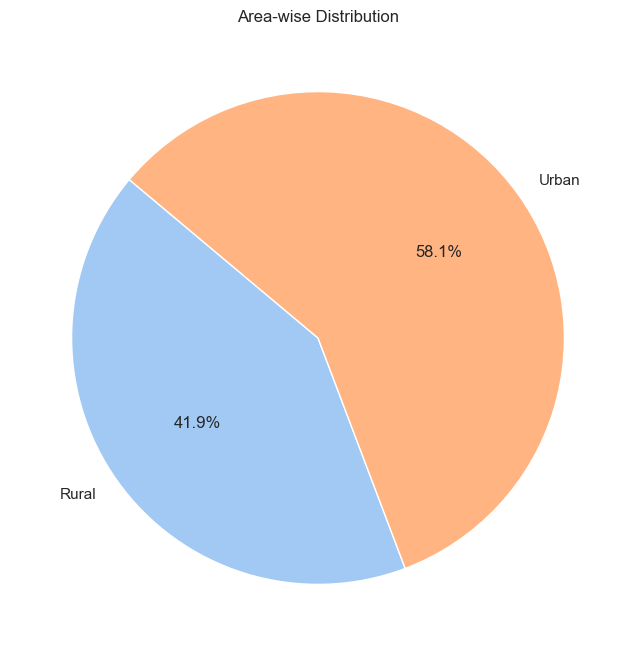

In [40]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.color_palette("pastel")
sns.set_palette("pastel")

plt.pie(obese_rural_urban_total['By Area'], labels=obese_rural_urban_total['Area'], autopct='%1.1f%%', startangle=140)
plt.title('Area-wise Distribution')
plt.show()

                            figure 4.3

In [41]:
obese_women_cols = ['overweight or obese women (15-49)',
       'mothers with sufficient iron folic acid (100+ days)',
       'mothers with sufficient iron folic acid (180+ days)',
       'women with very high blood sugar (15+)',
       'women with high or very high blood sugar or on medication (15+)',
       'women with elevated blood pressure or on medication (15+)',
       'women using hygienic methods (15-24)']

In [42]:
# Correlation with other columns 

df = df.dropna()
correlation_matrix = obese_data[obese_women_cols].corr()
overweight_correlation = correlation_matrix['overweight or obese women (15-49)']

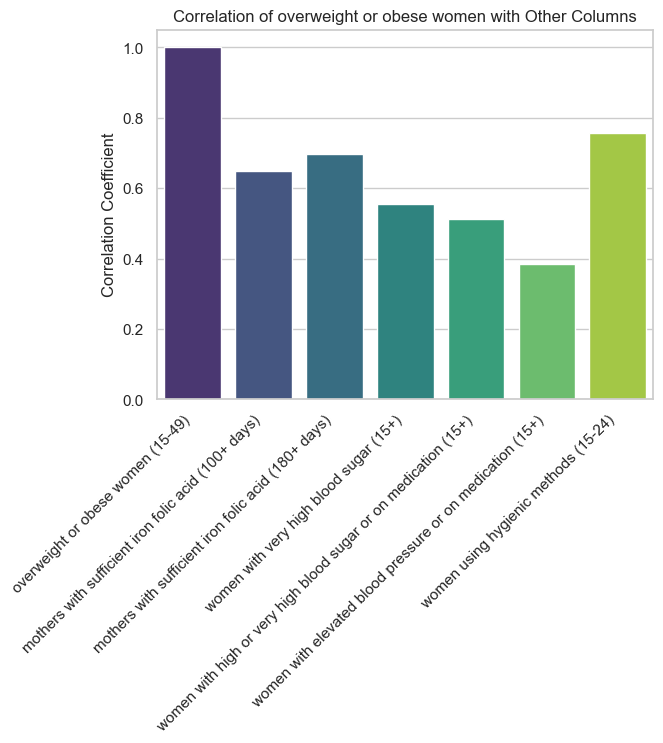

In [43]:
sns.barplot(x=overweight_correlation.index, y=overweight_correlation.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation of overweight or obese women with Other Columns')
plt.ylabel('Correlation Coefficient')
plt.show()

                            figure 4.4

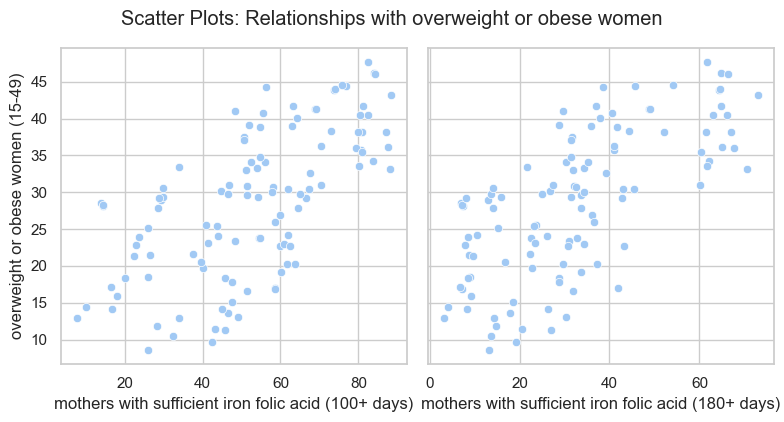

In [44]:
# Sufficient iron folic acid vs obese women 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharey=True)

sns.scatterplot(x='mothers with sufficient iron folic acid (100+ days)', y='overweight or obese women (15-49)', data=obese_data, ax=axes[0])
sns.scatterplot(x='mothers with sufficient iron folic acid (180+ days)', y='overweight or obese women (15-49)', data=obese_data, ax=axes[1])

plt.tight_layout()

plt.suptitle('Scatter Plots: Relationships with overweight or obese women', y=1.05)
plt.show()

                            figure 4.5 

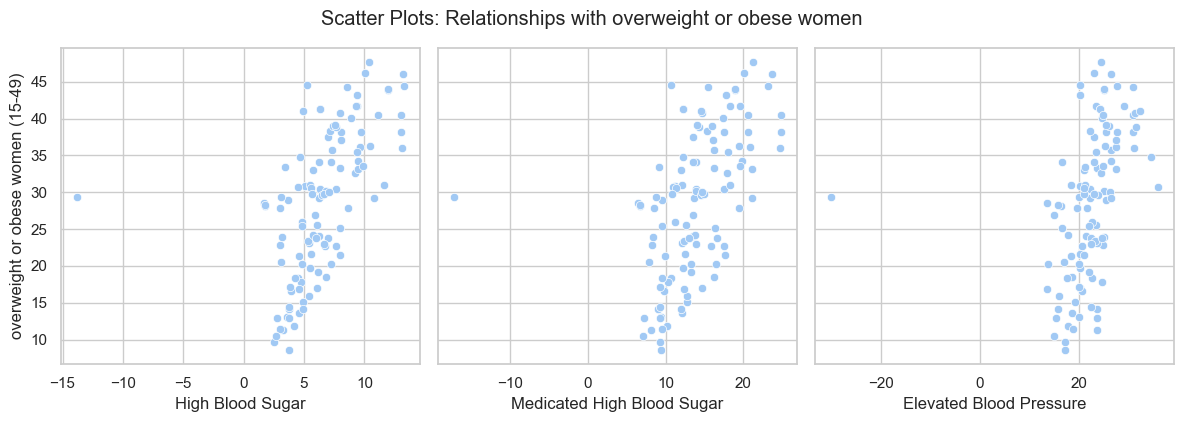

In [45]:
# Effect of blood pressure 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharey=True)

sns.scatterplot(x='women with very high blood sugar (15+)', y='overweight or obese women (15-49)', data=obese_data, ax=axes[0])
axes[0].set_xlabel('High Blood Sugar')

sns.scatterplot(x='women with high or very high blood sugar or on medication (15+)', y='overweight or obese women (15-49)', data=obese_data, ax=axes[1])
axes[1].set_xlabel('Medicated High Blood Sugar')

sns.scatterplot(x='women with elevated blood pressure or on medication (15+)', y='overweight or obese women (15-49)', data=obese_data, ax=axes[2])
axes[2].set_xlabel('Elevated Blood Pressure')

plt.tight_layout()

plt.suptitle('Scatter Plots: Relationships with overweight or obese women', y=1.05)
plt.show()


                            figure 4.5

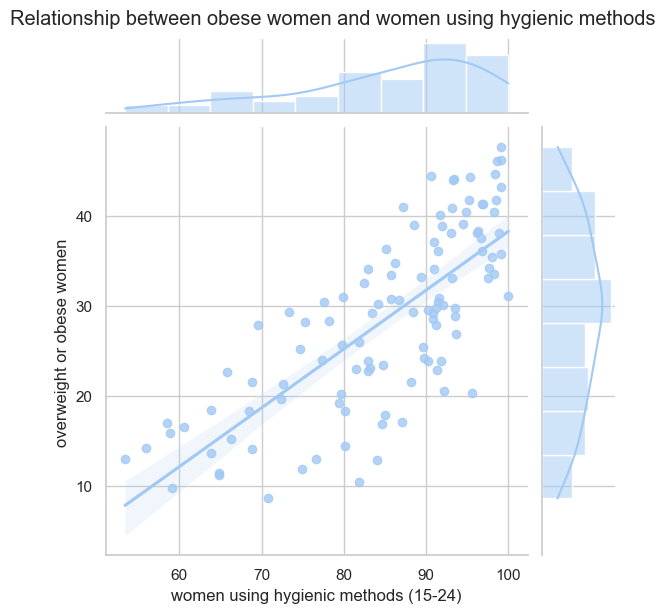

In [46]:
# Use of hygienic methods 

sns.jointplot(x='women using hygienic methods (15-24)', y='overweight or obese women (15-49)', data=obese_data, kind='reg')

plt.suptitle('Relationship between obese women and women using hygienic methods', y=1.02)
plt.xlabel('women using hygienic methods (15-24)')
plt.ylabel('overweight or obese women')
plt.show()

                            figure 4.6   

## 5. Obesity in men (India) 

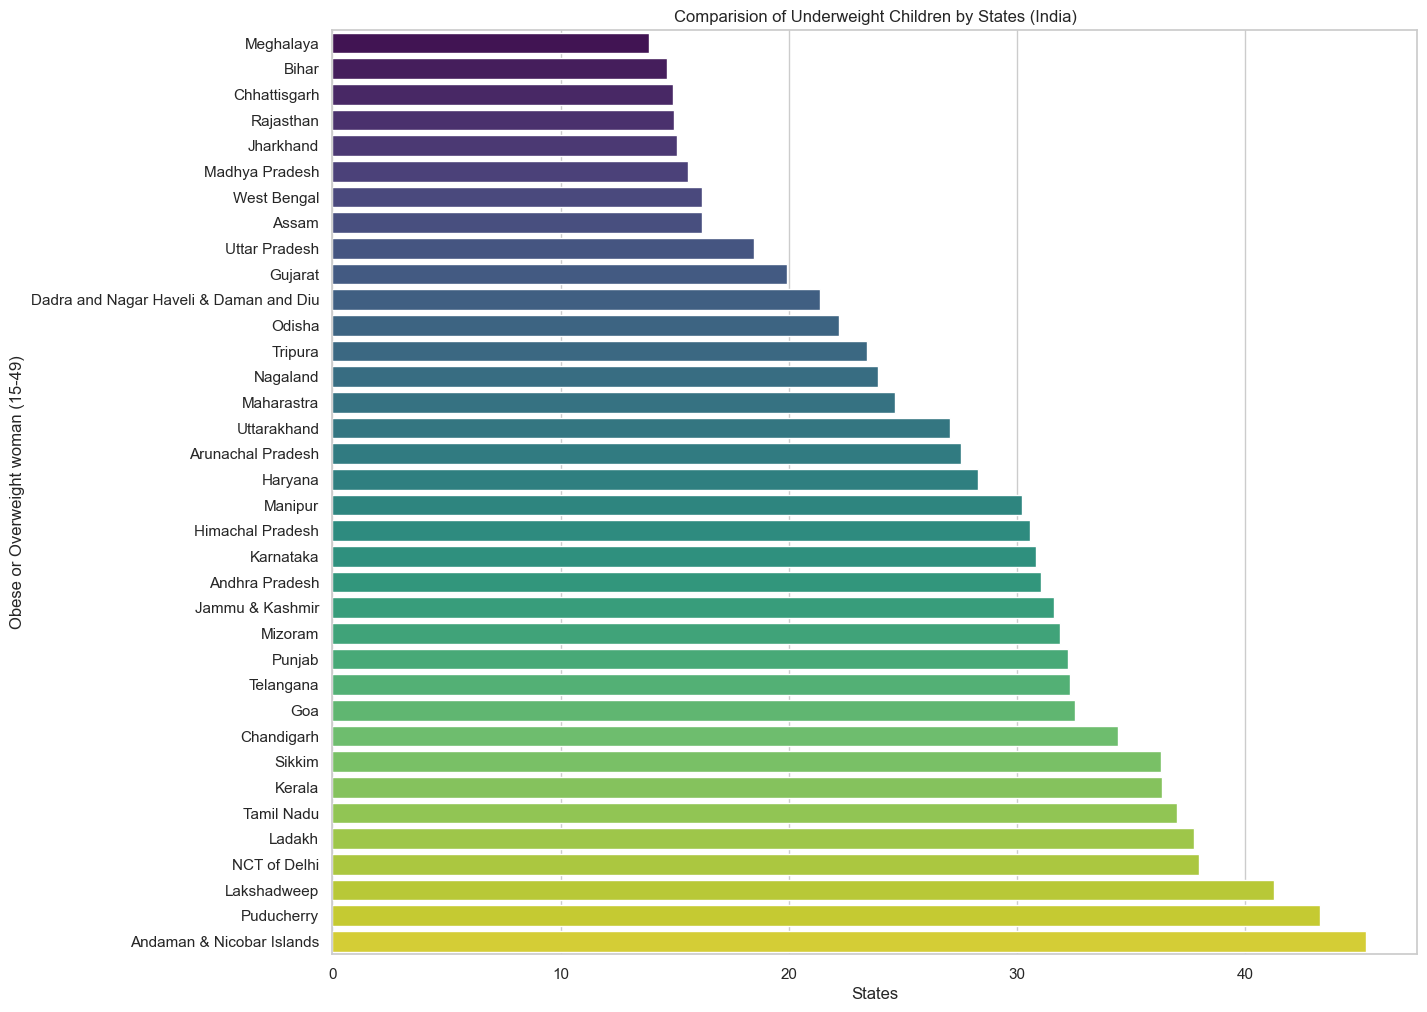

In [60]:
# Distribution of obese men - State wise

plt.figure(figsize = (14, 12))

categories = obese_total["States/UTs"]
values = obese_total['overweight or obese men (15-49)']

sns.barplot(x=values, y=categories, palette='viridis')

plt.xlabel('States')
plt.ylabel('Obese or Overweight woman (15-49)')
plt.title('Comparision of Underweight Children by States (India)')

plt.show()

                            figure 5.1  

In [48]:
# Area wise distribution 

obese_rural_urban_total = obese_data[obese_data["Area"] != "Total"].groupby('Area')['overweight or obese men (15-49)'].sum().reset_index(name='By Area')

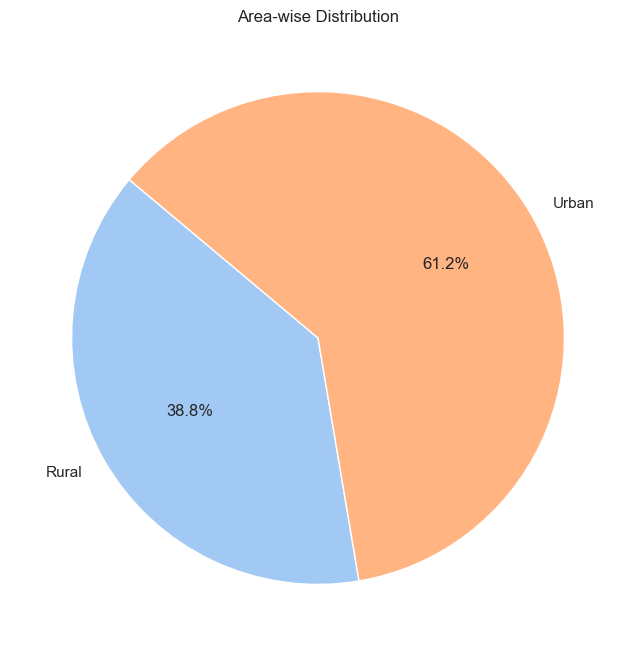

In [49]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.color_palette("pastel")
sns.set_palette("pastel")

plt.pie(obese_rural_urban_total['By Area'], labels=obese_rural_urban_total['Area'], autopct='%1.1f%%', startangle=140)
plt.title('Area-wise Distribution')
plt.show()

                            figure 5.2

In [50]:
obese_men_cols = ['overweight or obese men (15-49)',
       'Men with very high blood sugar level (15+)',
       'men with high or very high blood sugar or on medication (15+)',
       'men with elevated blood pressure or on medication (15+)']

In [51]:
# Correlation columns 

df = df.dropna()
correlation_matrix = obese_data[obese_men_cols].corr()
overweight_correlation = correlation_matrix['overweight or obese men (15-49)']

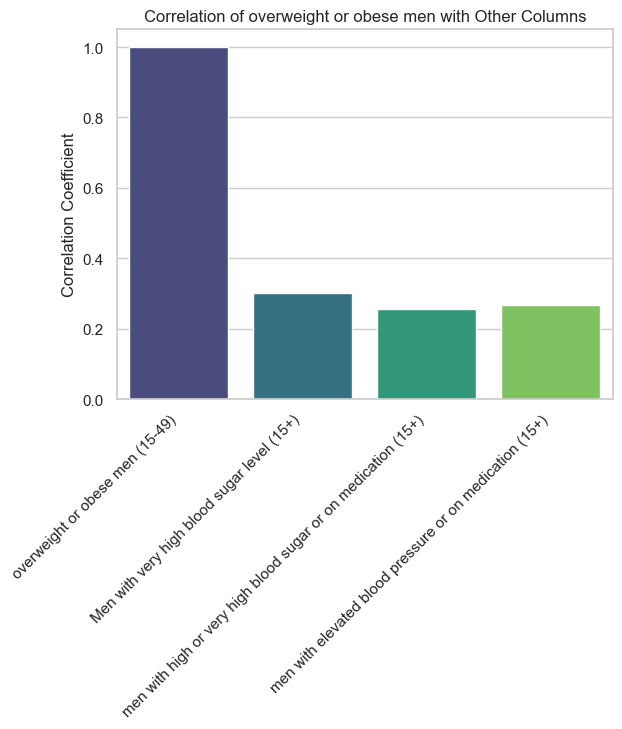

In [52]:
sns.barplot(x=overweight_correlation.index, y=overweight_correlation.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation of overweight or obese men with Other Columns')
plt.ylabel('Correlation Coefficient')
plt.show()

                            figure 5.3 

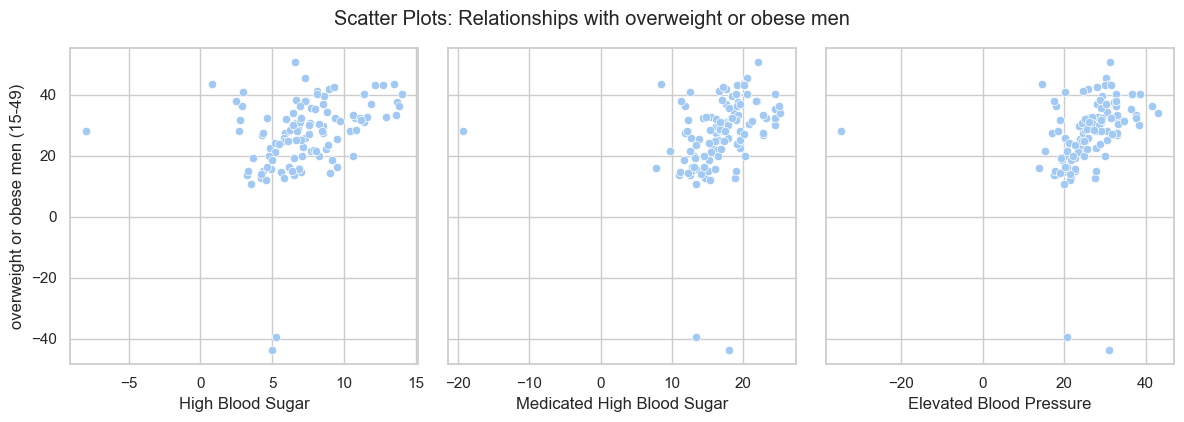

In [53]:
# Effect of blood pressure 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharey=True)

sns.scatterplot(x='Men with very high blood sugar level (15+)', y='overweight or obese men (15-49)', data=obese_data, ax=axes[0])
axes[0].set_xlabel('High Blood Sugar')

sns.scatterplot(x='men with high or very high blood sugar or on medication (15+)', y='overweight or obese men (15-49)', data=obese_data, ax=axes[1])
axes[1].set_xlabel('Medicated High Blood Sugar')

sns.scatterplot(x='men with elevated blood pressure or on medication (15+)', y='overweight or obese men (15-49)', data=obese_data, ax=axes[2])
axes[2].set_xlabel('Elevated Blood Pressure')

plt.tight_layout()

plt.suptitle('Scatter Plots: Relationships with overweight or obese men', y=1.05)
plt.show()


                            figure 5.4